# Regression Model Evaluation
### March 2016

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.svm import SVR, LinearSVR
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression

### define functions

In [2]:
def helpFloat(x): 
    try:
        return float ( float(x['thumbsup']) / (float(x['thumbsup']) + float(x['thumbsdown'])) )
    except:
        return 0
    
def thumbsSum(x): 
    try:
        return int(x['thumbsup']) + int(x['thumbsdown']) 
    except:
        return 0
    
def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

### load buscape reviews

In [16]:
#reviews_features = pd.read_csv('reviews.csv.gz', compression='gzip')
reviews_features = pd.read_csv('amazon-help.csv.gz', compression='gzip')
reviews_features['helpfulness'] = reviews_features.apply(helpFloat,axis=1)
reviews_features['thumbstotal'] = reviews_features.apply(thumbsSum,axis=1)
reviews_features.shape

(35001, 46)

### filter dataset

In [17]:
reviews_features = reviews_features[reviews_features.thumbstotal>4]
reviews_features = reviews_features.sample(frac=0.5)
reviews_features = reviews_features[np.isfinite(reviews_features.helpfulness)]
reviews_features.shape

(7560, 46)

### split data and class

In [18]:
# split class and features
labels = reviews_features["helpfulness"].values
reviews_columns = reviews_features.select_dtypes(include=['float64','int']).columns.drop('helpfulness')
features = reviews_features[list(reviews_columns)].values

# clean features
features = np.abs(features)
features[np.isnan(features) == True] = 0

features.shape

(7560, 37)

## 1. Run 10-fold cross validation over N kbest features

###  1.1. for linear regression

In [19]:
linear_model = LinearSVR(epsilon=0.01)

n_features_linear = []
spearmanr_scores_linear = []

for i in range(1, 16):
    n_features_linear.append(i)
    
    kbest_features = SelectKBest(f_regression, k=i).fit_transform(features, labels)
    scores = cross_val_score(linear_model, kbest_features, labels, cv=5, scoring=spearmanr_scorer)
    spearmanr_scores_linear.append(scores.mean())
    
    print str(i) + ',' + str(scores.mean())

1,0.264577479247
2,0.309061121099
3,0.246335820587
4,0.189046124511
5,0.218878392375
6,0.192894486525
7,0.247329444234
8,0.278356429175
9,0.258949066942
10,0.277353898699
11,0.261650527562
12,0.228022927681
13,0.270860695266
14,0.283777662371
15,0.245552850761


###  1.2. for rbf regression

In [20]:
svr_model = SVR(C=1.0, epsilon=0.01, kernel='rbf')

n_features_svr = []
spearmanr_scores_svr = []

for i in range(1, 16):
    n_features_svr.append(i)
    
    kbest_features = SelectKBest(f_regression, k=i).fit_transform(features, labels)
    scores = cross_val_score(svr_model, kbest_features, labels, cv=5, scoring=spearmanr_scorer)
    spearmanr_scores_svr.append(scores.mean())
    
    print str(i) + ',' + str(scores.mean())

1,0.2632771355
2,0.318860449804
3,0.180562856459
4,0.0851601758336
5,0.0837264083553
6,0.0443358796982
7,0.0497812021299
8,0.0535269984956
9,0.0374884498102
10,0.0362105208214
11,0.0246590369491
12,0.0135820704079
13,0.0184882931187
14,0.019847366111
15,0.0275927761559


### 1.3 Plot Chart

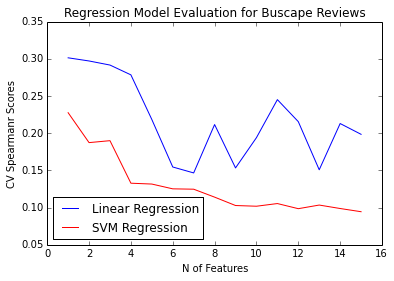

In [15]:
plt.figure()

plt.plot(n_features_linear, spearmanr_scores_linear, 'b', label='Linear Regression')
plt.plot(n_features_svr, spearmanr_scores_svr, 'r', label='SVM Regression')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(loc='lower left')

plt.title('Regression Model Evaluation for Buscape Reviews')
plt.show()

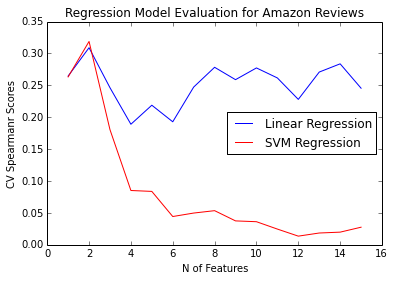

In [23]:
plt.figure()

plt.plot(n_features_linear, spearmanr_scores_linear, 'b', label='Linear Regression')
plt.plot(n_features_svr, spearmanr_scores_svr, 'r', label='SVM Regression')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(loc='center right')

plt.title('Regression Model Evaluation for Amazon Reviews')
plt.show()